# Import JAX with TPU

In [1]:
import jax.tools.colab_tpu
jax.tools.colab_tpu.setup_tpu()
print(jax.default_backend())

tpu


# Import other packages

In [2]:
import numpy as np
import jax.numpy as jnp
import time

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Evaluate Sine function $x \in [-3, 3]$

In [3]:
x = np.linspace(-3., 3., 100)
print(x, type(x))

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [4]:
# jnp.array simply turn numpy/list to array for jax
x = jnp.array(x)
print(x, type(x))

[-3.         -2.939394   -2.878788   -2.8181818  -2.7575758  -2.6969697
 -2.6363637  -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.3333333
 -2.2727273  -2.2121212  -2.1515152  -2.090909   -2.030303   -1.969697
 -1.9090909  -1.8484849  -1.7878788  -1.7272727  -1.6666666  -1.6060606
 -1.5454545  -1.4848485  -1.4242424  -1.3636364  -1.3030303  -1.2424242
 -1.1818181  -1.1212121  -1.060606   -1.         -0.93939394 -0.8787879
 -0.8181818  -0.75757575 -0.6969697  -0.6363636  -0.57575756 -0.5151515
 -0.45454547 -0.3939394  -0.33333334 -0.27272728 -0.21212122 -0.15151516
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151516  0.21212122
  0.27272728  0.33333334  0.3939394   0.45454547  0.5151515   0.57575756
  0.6363636   0.6969697   0.75757575  0.8181818   0.8787879   0.93939394
  1.          1.060606    1.1212121   1.1818181   1.2424242   1.3030303
  1.3636364   1.4242424   1.4848485   1.5454545   1.6060606   1.6666666
  1.7272727   1.7878788   1.8484849   1.9090909   1.969697   

In [5]:
f = lambda x: jnp.sin(x)
y = f(x)
print(y, type(y))

[-0.14112    -0.20082368 -0.25978994 -0.31780246 -0.37464783 -0.4301175
 -0.48400778 -0.536121   -0.5862654  -0.6342571  -0.6799197  -0.72308594
 -0.76359683 -0.8013038  -0.83606845 -0.86776316 -0.8962714  -0.9214885
 -0.94332206 -0.9616917  -0.97653    -0.98778254 -0.99540794 -0.99937826
 -0.9996789  -0.99630874 -0.98928016 -0.978619   -0.96436435 -0.9465686
 -0.925297   -0.90062785 -0.8726516  -0.84147096 -0.80720055 -0.769966
 -0.7299042  -0.6871622  -0.641897   -0.59427476 -0.54447037 -0.4926667
 -0.43905398 -0.38382906 -0.32719472 -0.2693589  -0.21053405 -0.1509361
 -0.09078392 -0.03029839  0.03029839  0.09078392  0.1509361   0.21053405
  0.2693589   0.32719472  0.38382906  0.43905398  0.4926667   0.54447037
  0.59427476  0.641897    0.6871622   0.7299042   0.769966    0.80720055
  0.84147096  0.8726516   0.90062785  0.925297    0.9465686   0.96436435
  0.978619    0.98928016  0.99630874  0.9996789   0.99937826  0.99540794
  0.98778254  0.97653     0.9616917   0.94332206  0.921488

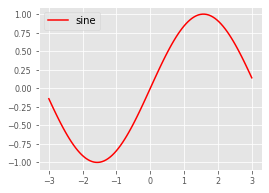

In [6]:
plt.plot(x,y, color='red', label='sine')
plt.legend()
plt.show()

# Compute grad ($\frac{dy}{dx}$) for $x \in [-3,3]$

In [7]:
g = jax.grad(f)

In [8]:
# Note that jax.grad only can be applied to scalar-output functions.
z = []
for i in x:
  z.append(g(i))
z = jnp.array(z)
print(z, type(z))

[-0.9899925  -0.97962743 -0.96566516 -0.94815695 -0.9271672  -0.9027729
 -0.8750637  -0.8441411  -0.81011903 -0.7731222  -0.7332865  -0.6907581
 -0.64569336 -0.59825766 -0.5486252  -0.49697793 -0.443506   -0.38840553
 -0.33187878 -0.27413347 -0.21538144 -0.15583865 -0.09572351 -0.03525699
  0.02533911  0.08584205  0.14602989  0.20568141  0.2645778   0.32250252
  0.37924317  0.4345911   0.48834333  0.5403023   0.5902773   0.6380849
  0.6835494   0.72650397  0.76679087  0.80426204  0.83878005  0.8702181
  0.8984607   0.92340416  0.94495696  0.9630399   0.9775865   0.9885435
  0.9958706   0.9995409   0.9995409   0.9958706   0.9885435   0.9775865
  0.9630399   0.94495696  0.92340416  0.8984607   0.8702181   0.83878005
  0.80426204  0.76679087  0.72650397  0.6835494   0.6380849   0.5902773
  0.5403023   0.48834333  0.4345911   0.37924317  0.32250252  0.2645778
  0.20568141  0.14602989  0.08584205  0.02533911 -0.03525699 -0.09572351
 -0.15583865 -0.21538144 -0.27413347 -0.33187878 -0.3884055

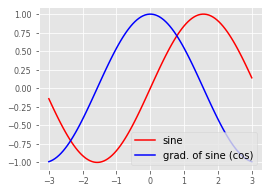

In [9]:
plt.plot(x,y, color='red', label='sine')
plt.plot(x,z, color='blue', label='grad. of sine (cos)')
plt.legend()
plt.show()

# Compute Hessian ($\frac{d^2y}{dx^2}$) for $x \in [-3, 3]$

In [10]:
# Hessian is just grad. of grad.
h = jax.grad(g)

In [11]:
t = []
for i in x:
  t.append(h(i))
t = jnp.array(t)
print(z, type(t))

[-0.9899925  -0.97962743 -0.96566516 -0.94815695 -0.9271672  -0.9027729
 -0.8750637  -0.8441411  -0.81011903 -0.7731222  -0.7332865  -0.6907581
 -0.64569336 -0.59825766 -0.5486252  -0.49697793 -0.443506   -0.38840553
 -0.33187878 -0.27413347 -0.21538144 -0.15583865 -0.09572351 -0.03525699
  0.02533911  0.08584205  0.14602989  0.20568141  0.2645778   0.32250252
  0.37924317  0.4345911   0.48834333  0.5403023   0.5902773   0.6380849
  0.6835494   0.72650397  0.76679087  0.80426204  0.83878005  0.8702181
  0.8984607   0.92340416  0.94495696  0.9630399   0.9775865   0.9885435
  0.9958706   0.9995409   0.9995409   0.9958706   0.9885435   0.9775865
  0.9630399   0.94495696  0.92340416  0.8984607   0.8702181   0.83878005
  0.80426204  0.76679087  0.72650397  0.6835494   0.6380849   0.5902773
  0.5403023   0.48834333  0.4345911   0.37924317  0.32250252  0.2645778
  0.20568141  0.14602989  0.08584205  0.02533911 -0.03525699 -0.09572351
 -0.15583865 -0.21538144 -0.27413347 -0.33187878 -0.3884055

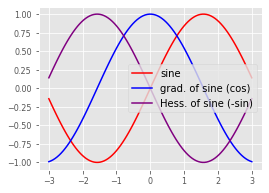

In [12]:
plt.plot(x,y, color='red', label='sine')
plt.plot(x,z, color='blue', label='grad. of sine (cos)')
plt.plot(x,t, color='purple', label='Hess. of sine (-sin)')
plt.legend()
plt.show()

# How can we implement this without for loop?

In [13]:
# jax.vmap returns a vectorizing mapped version of given function.
# This makes parallel computation along axis.
g_vmapped = jax.vmap(g)

In [14]:
z = g_vmapped(x)
print(z, type(z))

[-0.9899925  -0.97962743 -0.96566516 -0.94815695 -0.9271672  -0.9027729
 -0.8750637  -0.8441411  -0.81011903 -0.7731222  -0.7332865  -0.6907581
 -0.64569336 -0.59825766 -0.5486252  -0.49697793 -0.443506   -0.38840553
 -0.33187878 -0.27413347 -0.21538144 -0.15583865 -0.09572351 -0.03525699
  0.02533911  0.08584205  0.14602989  0.20568141  0.2645778   0.32250252
  0.37924317  0.4345911   0.48834333  0.5403023   0.5902773   0.6380849
  0.6835494   0.72650397  0.76679087  0.80426204  0.83878005  0.8702181
  0.8984607   0.92340416  0.94495696  0.9630399   0.9775865   0.9885435
  0.9958706   0.9995409   0.9995409   0.9958706   0.9885435   0.9775865
  0.9630399   0.94495696  0.92340416  0.8984607   0.8702181   0.83878005
  0.80426204  0.76679087  0.72650397  0.6835494   0.6380849   0.5902773
  0.5403023   0.48834333  0.4345911   0.37924317  0.32250252  0.2645778
  0.20568141  0.14602989  0.08584205  0.02533911 -0.03525699 -0.09572351
 -0.15583865 -0.21538144 -0.27413347 -0.33187878 -0.3884055

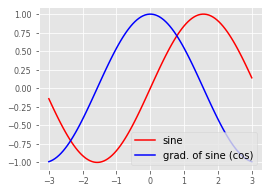

In [15]:
plt.plot(x,y, color='red', label='sine')
plt.plot(x,z, color='blue', label='grad. of sine (cos)')
plt.legend()
plt.show()

# Linearization with Jacobian-vector product (JVP)

$$
f^\mathrm{lin}_{x}(\delta) := f(x) + \nabla_{x}^\top f(x) \delta
$$

where $x$ is called primal, $\delta$ is tangent.

In [16]:
# Note that jax.jvp returns primals_out (function evaluated at x) and tangents_out (Jacobian-vector product result)
def f_lin(x, delta):
  primals_out, tangents_out = jax.jvp(f, [x], [delta])
  return primals_out + tangents_out

In [17]:
# We want linearized output of x given 0 is the linearized point
y_lin = f_lin(jnp.zeros_like(x), x)

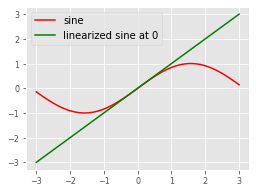

In [18]:
plt.plot(x,y, color='red', label='sine')
plt.plot(x,y_lin, color='green', label='linearized sine at 0')
plt.legend()
plt.show()

# Faster computation with Just-in-time (JIT) compile

In [19]:
latency = []
for i in range(10):
  start_time = time.time()
  y_lin = f_lin(jnp.zeros_like(x), x)
  end_time = time.time()
  latency.append(end_time - start_time)
  print(f'Latency {i} : {latency[i]:.4f}')
print(f'Average latency : {np.mean(latency[1:]):.4f} ± {np.std(latency[1:])/np.sqrt(len(latency)-1):.4f}')

Latency 0 : 0.0166
Latency 1 : 0.0105
Latency 2 : 0.0095
Latency 3 : 0.0102
Latency 4 : 0.0089
Latency 5 : 0.0115
Latency 6 : 0.0091
Latency 7 : 0.0101
Latency 8 : 0.0104
Latency 9 : 0.0093
Average latency : 0.0100 ± 0.0003


In [20]:
# Note that first computation with jax.jit takes more time to compile
f_lin_jitted = jax.jit(f_lin)

latency = []
for i in range(10):
  start_time = time.time()
  y_lin = f_lin_jitted(jnp.zeros_like(x), x)
  end_time = time.time()
  latency.append(end_time - start_time)
  print(f'Latency {i} : {latency[i]:.4f}')
print(f'Average latency : {np.mean(latency[1:]):.4f} ± {np.std(latency[1:])/np.sqrt(len(latency)-1):.4f}')

Latency 0 : 0.0523
Latency 1 : 0.0045
Latency 2 : 0.0046
Latency 3 : 0.0058
Latency 4 : 0.0057
Latency 5 : 0.0049
Latency 6 : 0.0087
Latency 7 : 0.0056
Latency 8 : 0.0136
Latency 9 : 0.0052
Average latency : 0.0065 ± 0.0009
